### Introduction
Context: Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

Content: Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:
Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

### dataset in kaggle: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

###  Importing Libraries

In [58]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

###  Loading and Reading Data

In [59]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


###  Data Cleaning: Cleaning Strings in Column and values

In [60]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')
    
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


### Data Preparation

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [62]:
df['totalcharges'].value_counts()

20.2       11
_          11
19.75       9
19.9        8
20.05       8
           ..
762.1       1
1216.35     1
5661.7      1
445.85      1
453.75      1
Name: totalcharges, Length: 6531, dtype: int64

In [63]:
# We convert totalcharges to numerical and to ignore the errors (in our case  "_") we use errors='coerce'
# Store the results back to the original column
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

#  Finally take care of the the missing values in totalcharges columns by filling up by 0.
df.totalcharges = df.totalcharges.fillna(0)

In [64]:
df.churn = (df.churn == 'yes').astype(int)

### Setting up the validation framework


In [65]:
from sklearn.model_selection import train_test_split

# Making full_train and test set
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

# Next making train and validation set from full_train set
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

# checking the number of values in datasets
print("Train_set %s:" %len(df_train), "Validation_set %s:" %len(df_val), "Test_set %s:" %len(df_test))

# Dropping indexes of these datasets
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Creating Dependent Variables
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

# Deleting target column i.e. churn from training datasets
del df_train['churn']
del df_val['churn']
del df_test['churn']

Train_set 4225: Validation_set 1409: Test_set 1409:


### Exploratory Data Analysis

In [66]:
"""Removing the index column"""
df_full_train = df_full_train.reset_index(drop=True)

"""Checking for missing values"""
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [67]:

print(df_full_train['churn'].value_counts(normalize = True))

print(df_full_train['churn'].mean())

useful_features = [col for col in df_full_train.columns if col not in ['customerid', 'churn']]
categorical = [col for col in useful_features if df_full_train[col].dtype == 'object'] + ['seniorcitizen']
numerical = [col for col in useful_features if col not in categorical]

0    0.730032
1    0.269968
Name: churn, dtype: float64
0.26996805111821087


### Feature Importance: Churn Rate and Risk Ratio

In [68]:
global_churn = df_full_train.churn.mean()

for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c)['churn'].agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group.style.background_gradient("bone_r"))
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


### Feature Importance: Correlation

In [69]:
from sklearn.metrics import mutual_info_score

def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending = False).to_frame().reset_index().rename({'index': 'Variables', 0: 'Improtance'}, axis = 1).style.background_gradient('crest')

,Variables,Improtance
0,contract,0.098320
1,onlinesecurity,0.063085
2,techsupport,0.061032
3,internetservice,0.055868
4,onlinebackup,0.046923
5,deviceprotection,0.043453
6,paymentmethod,0.043210
7,streamingtv,0.031853
8,streamingmovies,0.031581
9,paperlessbilling,0.017589


### Feature Importance: Mutual Information

In [70]:
"""Checking the correaltion of numerical Columns with Target variable churn"""

df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [71]:
"""Correlation matrix"""
df[numerical].corr()

,tenure,monthlycharges,totalcharges
tenure,1.000000,0.247900,0.826178
monthlycharges,0.247900,1.000000,0.651174
totalcharges,0.826178,0.651174,1.000000


<AxesSubplot:>

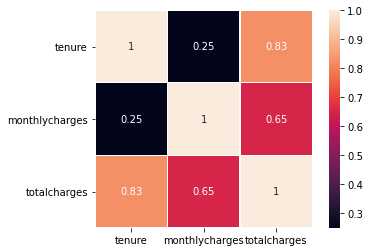

In [72]:
"""Using heatmap"""
sns.heatmap(df[numerical].corr(), square = True, annot = True, lw = 0.2)

In [73]:
print("Mean Churn Rate when Tenure <= 2: ",df_full_train[df_full_train.tenure <= 2].churn.mean())
print("Mean Churn Rate when Tenure between 2 and 12: ",df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean())
print("Mean Churn Rate when Tenure more than 12: ",df_full_train[df_full_train.tenure > 12].churn.mean())
print()
print("Mean Churn Rate when monthlycharges <= 20: ",df_full_train[df_full_train.monthlycharges <= 20].churn.mean())
print("Mean Churn Rate when monthlycharges between 20 and 50: ",df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean())
print("Mean Churn Rate when monthlycharges more than 50: ",df_full_train[df_full_train.monthlycharges > 50].churn.mean())

Mean Churn Rate when Tenure <= 2:  0.5953420669577875
Mean Churn Rate when Tenure between 2 and 12:  0.3994413407821229
Mean Churn Rate when Tenure more than 12:  0.17634908339788277

Mean Churn Rate when monthlycharges <= 20:  0.08795411089866156
Mean Churn Rate when monthlycharges between 20 and 50:  0.18340943683409436
Mean Churn Rate when monthlycharges more than 50:  0.32499341585462205


###  One Hot Encoding using DictVectorizer

In [88]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)                              

train_dict = df_train[useful_features].to_dict(orient='records') # For making dict row-wise we use orient = 'records
X_train = dv.fit_transform(train_dict)

val_dict = df_val[useful_features].to_dict(orient='records') # For making dict row-wise we use orient = 'records'
X_val = dv.transform(val_dict)

###  Logistic Regression

In [89]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
        
    return result

def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
        
    result = sigmoid(score)
    return result

### Training logistic regression with Scikit-Learn

In [90]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs')

model.fit(X_train, y_train)

LogisticRegression()

In [91]:
print("w0 = ", model.intercept_[0])

print("wi = ",model.coef_[0].round(3))

w0 =  -0.10900684766421853
wi =  [ 0.475 -0.175 -0.408 -0.03  -0.078  0.063 -0.089 -0.081 -0.034 -0.073
 -0.335  0.317 -0.089  0.004 -0.258  0.141  0.009  0.063 -0.089 -0.081
  0.266 -0.089 -0.284 -0.231  0.124 -0.166  0.058 -0.087 -0.032  0.071
 -0.059  0.141 -0.249  0.216 -0.12  -0.089  0.102 -0.071 -0.089  0.052
  0.213 -0.089 -0.232 -0.07   0.   ]


In [92]:
"""Applying the model to Validation set to predict the probability"""
y_pred = model.predict_proba(X_val)[:, 1]

"""Making churn decision using probability threshold of 0.5"""
churn_decision = (y_pred >= 0.5)

"""Accuracy Rate: mean of correct predictions"""
(y_val == churn_decision).mean()

0.8034066713981547

In [93]:
"""Observe the above result in a dataset"""
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

df_pred['correct'] = df_pred.prediction == df_pred.actual
display(df_pred)
display("Accuracy Rate", df_pred['correct'].mean())

,probability,prediction,actual,correct
0,0.008997,0,0,True
1,0.204631,0,0,True
2,0.212349,0,0,True
3,0.543107,1,1,True
4,0.213905,0,0,True
...,...,...,...,...
1404,0.313802,0,0,True
1405,0.039366,0,1,False
1406,0.136403,0,0,True
1407,0.799830,1,1,True


'Accuracy Rate'

0.8034066713981547

### Model interpretation

In [94]:
a = [1, 2, 3, 4]
b = 'abcd'

"""zip() comnines the both values by position"""
dict(zip(a, b))

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

In [95]:
"""Now using zip to combine features and their respective coefficients"""
dict(zip(dv.get_feature_names(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.071,


In [96]:
small = ['contract', 'tenure', 'monthlycharges']

df_train[small].iloc[:10].to_dict(orient='records')

# Creating training and Validation set
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

# Using dictVectorizer for OHE on categorical colums
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

# Checking the feature names to see how many new created by DictVectorizer
dv_small.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [97]:
"""Creating Training set"""
X_train_small = dv_small.transform(dicts_train_small)

"""making model on Training set"""
model_small = LogisticRegression(solver='lbfgs')
model_small.fit(X_train_small, y_train)

"""Assigning variables w0 and wi's to bias term and weights"""
w0 = model_small.intercept_[0]
wi = model_small.coef_[0].round(3)

"""Finally zipping w0 and wi understand interpret the model prediction"""
dict(zip(dv_small.get_feature_names(), wi.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [98]:
print(-2.47 + (-0.949) + 30 * 0.027 + 24 * (-0.036))

# Finally using sigmoid function on this value will give us the Probability of customer will churn or not
sigmoid(-3.473)

-3.473


0.030090303318277657

### Using the model

In [99]:
"""Now we train the model on the full_train set and predict on test set"""

dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

y_full_train = df_full_train.churn.values

model = LogisticRegression(solver='lbfgs')
model.fit(X_full_train, y_full_train)

dicts_test = df_test[categorical + numerical].to_dict(orient='records')

X_test = dv.transform(dicts_test)

y_pred = model.predict_proba(X_test)[:, 1]

churn_decision = (y_pred >= 0.5)

print("Accuracy on Test Set: ", (churn_decision == y_test).mean())

Accuracy on Test Set:  0.815471965933286


In [100]:
"""Predicting on an individual customer to check how the model behaves"""
customer = dicts_test[-1]
customer

{'gender': 'female',
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'seniorcitizen': 0,
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [101]:
X_small = dv.transform([customer])
print("Predicted Probability: ",model.predict_proba(X_small)[0, 1])
print("Original Value: ",y_test[-1])

Predicted Probability:  0.5968852088432921
Original Value:  1
